# Linear Regression
09/18/23 Monika Voutov

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

## Prepare Data - Accord

In [2]:
accord = pd.read_csv('data/Accord-142-Fall2023.csv')
accord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthNumeric   114 non-null    int64  
 1   MonthFactor    114 non-null    object 
 2   Year           114 non-null    int64  
 3   AccordSales    114 non-null    int64  
 4   Unemployment   114 non-null    float64
 5   AccordQueries  114 non-null    int64  
 6   CPIAll         114 non-null    float64
 7   CPIEnergy      114 non-null    float64
 8   MilesTraveled  114 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 8.1+ KB


In [3]:
accord.head()

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled
0,1,January,2014,20604,6.6,69,235.288,250.340,246531
1,2,February,2014,24622,6.7,74,235.547,249.925,249499
2,3,March,2014,33962,6.7,79,236.028,249.961,251120
3,4,April,2014,34124,6.2,74,236.468,249.864,251959
4,5,May,2014,39637,6.3,75,236.918,249.213,252289


In [4]:
# Splitting the data into training and testing set
training_data = accord[(accord["Year"] >= 2014) & (accord["Year"] <= 2018)]
testing_data = accord[(accord["Year"] == 2019) | (accord["Year"] >= 2019) & (accord["Year"] <= 2023)]
# check the shape of training and testing data
training_data.shape, testing_data.shape

((60, 9), (54, 9))

## Correlation table

In [5]:
accord.corr()

,MonthNumeric,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled
MonthNumeric,1.000000,-0.078869,0.171070,-0.046710,-0.200568,-0.001096,-0.028054,0.081741
Year,-0.078869,1.000000,-0.802511,-0.161497,0.251199,0.927506,0.543403,0.105095
AccordSales,0.171070,-0.802511,1.000000,0.009809,0.043314,-0.726031,-0.439333,0.086780
Unemployment,-0.046710,-0.161497,0.009809,1.000000,-0.350437,-0.267047,-0.371335,-0.873627
AccordQueries,-0.200568,0.251199,0.043314,-0.350437,1.000000,0.179350,0.091154,0.474339
CPIAll,-0.001096,0.927506,-0.726031,-0.267047,0.179350,1.000000,0.778468,0.148571
CPIEnergy,-0.028054,0.543403,-0.439333,-0.371335,0.091154,0.778468,1.000000,0.187088
MilesTraveled,0.081741,0.105095,0.086780,-0.873627,0.474339,0.148571,0.187088,1.000000


## Defining Variance Inflation Factor Formula

In [6]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)


## Exploring The Data

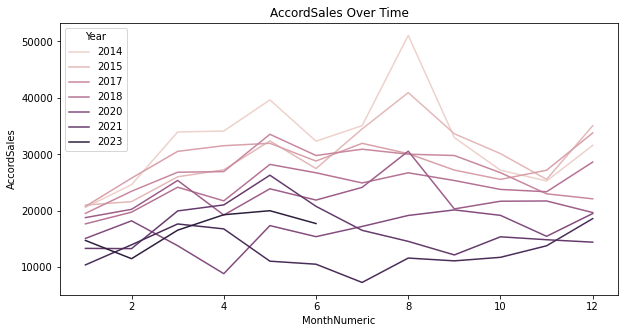

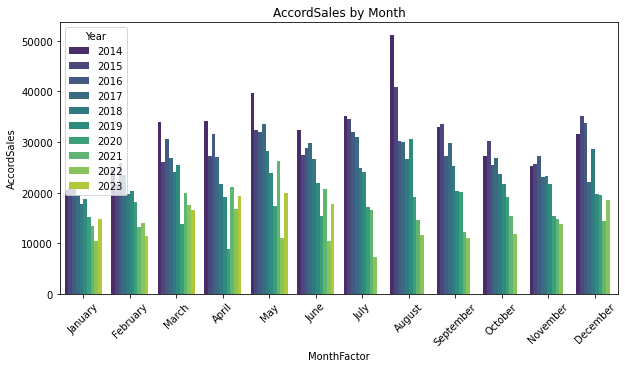

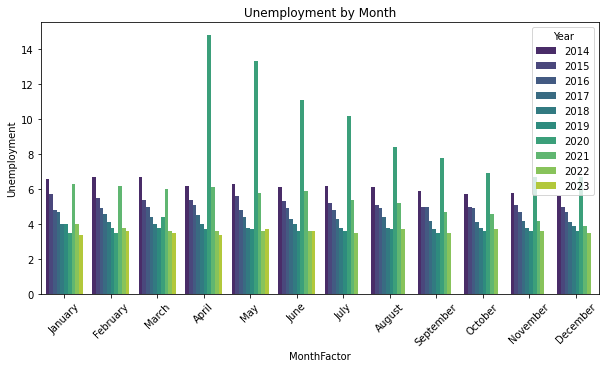

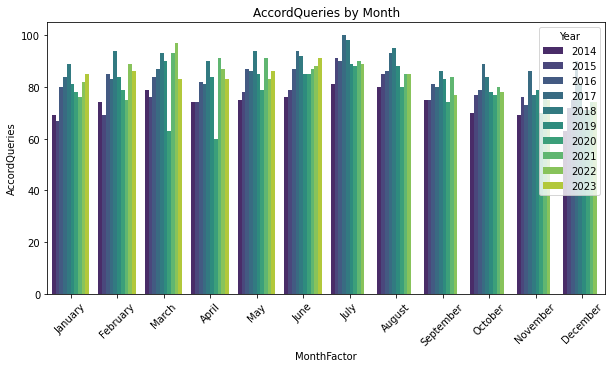

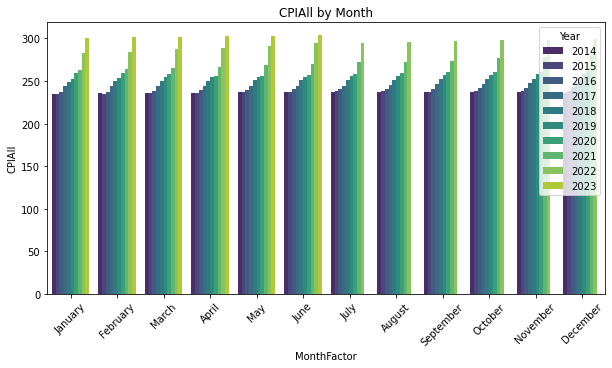

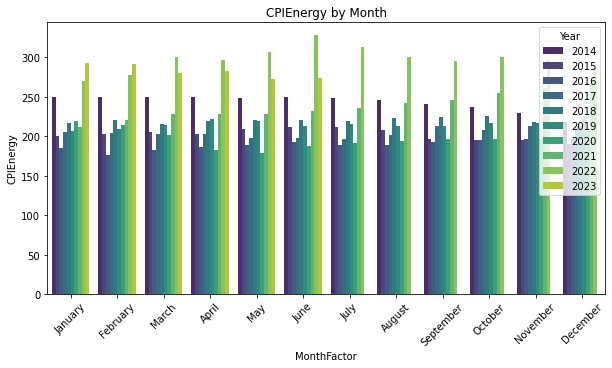

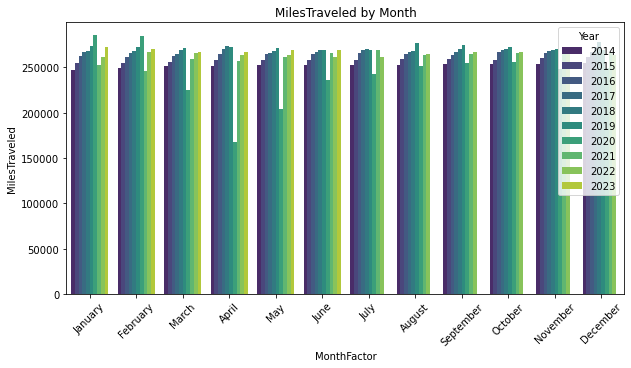

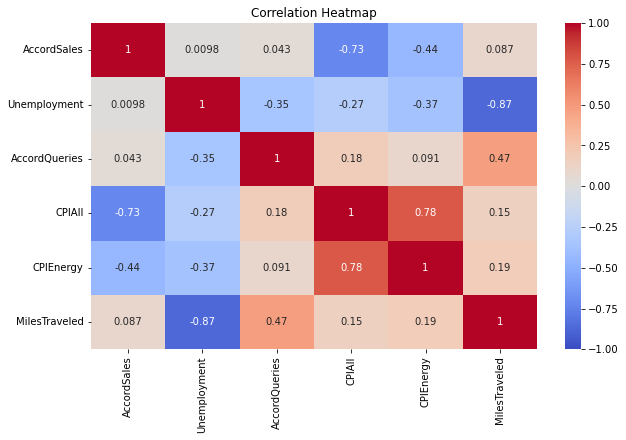

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
df = accord

# 1. Line plot for AccordSales over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='MonthNumeric', y='AccordSales', hue='Year')
plt.title('AccordSales Over Time')
plt.show()

# 2. Bar plots for each variable
variables = ['AccordSales', 'Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']

for var in variables:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='MonthFactor', y=var, hue='Year', palette='viridis')
    plt.title(var + ' by Month')
    plt.xticks(rotation=45)
    plt.show()
    
# 3. Correlation heatmap
corr_matrix = df[['AccordSales', 'Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


# Part 2a
# Linear Regression (OLS) - Model 1

Using 5 independent variables, `Unemployment + AccordQueries + CPIAll + CPIEnergy + MilesTraveled`.

In [62]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIAll + CPIEnergy + MilesTraveled', 
                 data=training_data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.683
Date:                Mon, 18 Sep 2023   Prob (F-statistic):            0.00612
Time:                        08:34:16   Log-Likelihood:                -595.60
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      54   BIC:                             1216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e+05   1.49e+05      1.164

### Variance Inflation Factor - Model 1

In [63]:
cols = ['Unemployment', 'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled']
VIF(training_data, cols)

Unemployment     31.683094
AccordQueries     1.939028
CPIAll           45.304922
CPIEnergy        12.340357
MilesTraveled    18.510210
dtype: float64

# Linear Regression (OLS) - Model 2

Using 4 independent variables, `Unemployment + AccordQueries + CPIEnergy + MilesTraveled`. Dropping `CPIAll` due to high VIF observed above.

In [64]:
#taking out CPIAll because of its high variance factor
model2 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIEnergy + MilesTraveled', 
                 data=training_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.660
Date:                Mon, 18 Sep 2023   Prob (F-statistic):             0.0103
Time:                        08:34:16   Log-Likelihood:                -597.33
No. Observations:                  60   AIC:                             1205.
Df Residuals:                      55   BIC:                             1215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.448e+04   9.49e+04     -0.363

### Variance Inflation Factor - Model 2

In [65]:
cols = ['Unemployment', 'AccordQueries', 'CPIEnergy', 'MilesTraveled']
VIF(training_data, cols)

Unemployment      9.836351
AccordQueries     1.938995
CPIEnergy         1.312659
MilesTraveled    10.051510
dtype: float64

# Linear Regression (OLS) - Model 3

Using 3 independent variables, `Unemployment + AccordQueries + CPIEnergy`. Dropping `MilesTraveled` due to high VIF observed above and high p-value in the summary of model 2.

In [66]:
model3 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIEnergy', 
                 data=training_data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     4.938
Date:                Mon, 18 Sep 2023   Prob (F-statistic):            0.00411
Time:                        08:34:17   Log-Likelihood:                -597.36
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      56   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9673.8804   1.44e+04     -0.672

### Variance Inflation Factor - Model 3

In [67]:
cols = ['Unemployment', 'AccordQueries', 'CPIEnergy']
VIF(training_data, cols)

Unemployment     2.245546
AccordQueries    1.891211
CPIEnergy        1.265462
dtype: float64

# Linear Regression (OLS) - Model 4

Using 2 independent variables, `Unemployment + AccordQueries`. Dropping `CPIEnergy` because from the model above we observe a very high p-value which coresponds to statistically insignificant coeficient. The VIF is not high for the 3 variables.

In [68]:
#buiild an interaciton between AccordQueries and unemployment
model4 = smf.ols(formula='AccordSales ~ AccordQueries + Unemployment', 
                 data=training_data).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     7.461
Date:                Mon, 18 Sep 2023   Prob (F-statistic):            0.00132
Time:                        08:34:18   Log-Likelihood:                -597.43
No. Observations:                  60   AIC:                             1201.
Df Residuals:                      57   BIC:                             1207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.124e+04   1.36e+04     -0.827

### Linear Regression Model Summary:

The linear regression equation from the `model4` for predicting `AccordSales` is:

**AccordSales** = -11,240 + 225.40 * **AccordQueries** + 4305.42 * **Unemployment**

#### Key Interpretations:

 * **Base Sales**: The base (y-intercept) expected sales of Accord (without considering any variables) is -11,240.

* **AccordQueries Impact**: One unit of increase in `AccordQueries` leads to a increase in sales by about 225.40 units. This makes sense, because as queries increase, the sales increase.

* **Unemployment Impact**: One units of increase in `Unemployment` leads to a increase in sales by about 4305.42 units. This makes sense, since Honda Accord is a cheap car, so it would be considered aan inferior good - the poorer the population is, the more of this model car people will buy. Also, 1 unit of Unemployment is more significant than 1 unit of queries. That's why we observe such a big number here. 

#### Variable Selection:

The model variables were chosen because they are the only ones with significant p-values (below 0.05). Also, the R$^2$ value from model3 did not go down by much (just 0.02) so this change did not have a large negative effect, however it simplifed the model. The other reason why I only choose 2 variables is that in model4, we observe a higher F-statistic than in Model3.

#### Coefficient Signs:

* **AccordQueries Sign**: The positive relation between `AccordQueries` and sales which makes total sense. More queries, more sales.

* **Unemployment Sign**: The positive impact of rising `Unemployment` on sales aligns with expectations. 


#### Model Performance:

The model explains about 20.7% of the variation in Accord sales based on the R$^2$ value. The model is statistically significant as evidenced by the high F-statistic p-value. All predictor variables are statistically significant. While the model provides some insights into the training data, it still has a lot of room for refinement as it is definetely not good at this moment.


# Part 2b
# Improving Linear Regression (OLS) - Model 5

Using 6 independent variables, `Unemployment + AccordQueries + CPIAll + CPIEnergy + MilesTraveled + MonthFactor`.

In [69]:
model5 = smf.ols(formula='AccordSales ~ Unemployment + AccordQueries + CPIAll + CPIEnergy + MilesTraveled + MonthFactor', 
                 data=training_data).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7.982
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           2.66e-08
Time:                        08:34:18   Log-Likelihood:                -563.04
No. Observations:                  60   AIC:                             1160.
Df Residuals:                      43   BIC:                             1196.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Improved Linear Regression Model 5 Summary:

The linear regression equation from the `model5` for predicting `AccordSales` is:

**AccordSales** = 97,750 + 10.66 * **AccordQueries** + 762.81 * **Unemployment** - 639.80 * **CPIAll** + ... + 0.25 * **MilesTraveled**. 
 
 (Note: the formula contains all the coefficients from the OLS model. They are too many to list here manually.)

#### Key Interpretations:

 * **MonthFactor**: The coefficients of the `MonthFactor` dummy variables represent the difference in AccordSales for a particular month compared to April, which is the reference month that has been left out in the dummy variable creation. For example, the coefficient for August (MonthFactor[T.August]) is 8,697.67, suggesting that, holding all else constant, the sales in August are higher by 8,697.67 units than April.


#### R$^2$ value and significant variables:

The training set R$^2$ for the new model is 0.748, indicating that the model explains 74.8% of the variability in AccordSales within the training dataset.

Looking at the p-values for each variable, we see that the significant variables at the 5% significance level include:

* `MonthFactor[T.August]`
* `MonthFactor[T.January]`
* `MonthFactor[T.May]`


#### Model Performance:

Yes, adding the MonthFactor seems to improve the quality of the model. The R$^2$ has increased to 0.748, suggesting that the model is capturing a significant proportion of the variation in sales. The inclusion of monthly dummies captures the seasonality in the sales data, which is a common factor in many sales datasets. However, it's also important to consider potential overfitting since we're adding several variables, and not all month factors are significant.

However, it is worth noting that from the exploration of the data, more specifically form **Line plot for AccordSales over time** we observe a decreasing trend in sales each year,thus even though we improve the R$^2$, I am still concerned with the overall performance of this model.


# Improving Linear Regression (OLS) - Model 6

Using 3 independent variables, `MonthFactor + CPIAll + CPIEnergy`.

In [70]:
model6 = smf.ols(formula='AccordSales ~ MonthFactor + CPIAll + CPIEnergy', 
                 data=training_data).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     10.28
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           1.16e-09
Time:                        08:34:18   Log-Likelihood:                -563.54
No. Observations:                  60   AIC:                             1155.
Df Residuals:                      46   BIC:                             1184.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Out-of-sample R-squared Formula

In [71]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [72]:
OSR2(model6, training_data, testing_data, 'AccordSales')

0.6617752524183734

### Improved Linear Regression Model 6 Summary:

* Training R$^2$: 0.744
* Adjusted R-squared: 0.672
* Testing OSR$^2$: 0.66


#### Analysis:

* **R$^2$ Value (Training set):** 0.744 implies that approximately 74.4% of the variation in AccordSales is explained by the independent variables in the model. This is a relatively good fit for the training data.
* **OSR$^2$ Value (test set):** The OSR$^2$ of approximately 0.6618 means that about 66.18% of the variation in the testing set's AccordSales can be predicted by the model. This is a commendable prediction capability for new, unseen data.
* **Comparison & Implication:** The OSR$^2$ (0.6618) is slightly lower than the R$^2$ (0.744). This is expected, as models often perform slightly worse on new, unseen data (the test set) compared to the data they were trained on. However, the difference is not huge, which suggests the model has generalized well and is not overfitting the training data.

#### Justification for Variable Selection:

* **`MonthFactor``**: The inclusion of months helps capture the seasonality in car sales. As seen from the coefficients and from the plots towards the begining of the document, sales tend to vary across months.

* **`CPIAll`**: The negative relationship between the overall Consumer Price Index and AccordSales should be capturing the effect of inflation. In the ealier models, when we did not have the MonthFactor we observed that `CPIall` and `CPIEnergy` variables has high p-values, and high VIF when working only with train data. However due to a significant trend change of car sales throughout the years (particularly from yearler years compared to recent years) accounting for inflation changes (change in price index) and month factor, the results on the test data should be significantly better (and this could be easily observed, with OSR$^2$ on all earlier models)

* **`CPIEnergy`**: This variable has a slightly higher p-value (above 0.05 treshhold), however the overall performance of the model is better when it is included.

#### Potential Issues:

**Multicollinearity**: The note at the bottom of the model summary warns of potential multicollinearity, which could make coefficient estimates unstable. It would be wise to further investigate this and potentially eliminate collinear variables.

# NON REVOLING CONSUMER CREDIT - Rederal Reserve data

Adding a column about nonrevolving consumer credit owned and securitized, not seasonally adjusted level. Nonrevolving loan is typically a car loan or a student loan that is taken out for a specific purpose and has a fixed date. This is in contrast to revolving credit, like credit cards, where consumers have a credit limit and can continually borrow and repay up to that limit. Not seasonally adjusted means that it is not normaized for seasonalities, there might be patterns based on months.
I picked this variable because it makes sense intuitively for consumer credit volume to correlate with car sales.

#### Concatenate new column: `'DTCTLN_N.M'`

In [73]:
credit = pd.read_csv('FRB_G19-2.csv', skiprows = 5)
credit = credit[['DTCTLN_N.M']]
credit.head()

,DTCTLN_N.M
0,2269574.02
1,2274503.63
2,2282515.69
3,2298022.06
4,2311492.84


In [74]:
accord['DTCTLN'] = credit['DTCTLN_N.M']
accord.head()
# Splitting the data into training and testing set
training_data = accord[(accord["Year"] >= 2014) & (accord["Year"] <= 2018)].copy()
testing_data = accord[(accord["Year"] == 2019) | (accord["Year"] >= 2019) & (accord["Year"] <= 2023)].copy()
# check the shape of training and testing data
training_data.shape, testing_data.shape

((60, 10), (54, 10))

### Create Final Linear Regression Model with new column from Rederal Reserve data

In [75]:
model7 = smf.ols(formula='AccordSales ~ MonthFactor + CPIAll + CPIEnergy + DTCTLN', 
                 data=training_data).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     9.700
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           2.13e-09
Time:                        08:34:20   Log-Likelihood:                -562.69
No. Observations:                  60   AIC:                             1155.
Df Residuals:                      45   BIC:                             1187.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

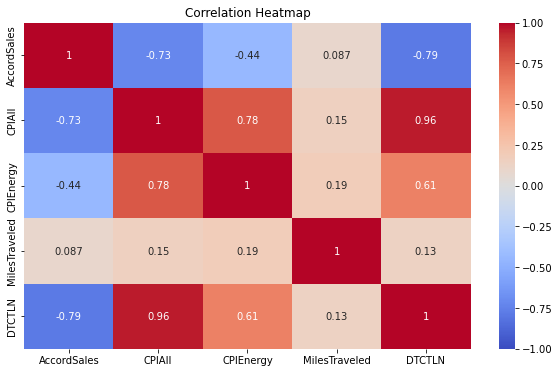

In [76]:
    # Correlation heatmap including 'DTCTLN'
corr_matrix = df[['AccordSales', 'CPIAll', 'CPIEnergy', 'MilesTraveled', 'DTCTLN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
OSR2(model7, training_data, testing_data, 'AccordSales')

0.8179502523778543

In [78]:
training_data['Predicted_AccordSales'] = model7.predict(training_data)
testing_data['Predicted_AccordSales'] = model7.predict(testing_data)
training_data.head(),testing_data.head()

(   MonthNumeric MonthFactor  Year  AccordSales  Unemployment  AccordQueries  \
 0             1     January  2014        20604           6.6             69   
 1             2    February  2014        24622           6.7             74   
 2             3       March  2014        33962           6.7             79   
 3             4       April  2014        34124           6.2             74   
 4             5         May  2014        39637           6.3             75   
 
     CPIAll  CPIEnergy  MilesTraveled      DTCTLN  Predicted_AccordSales  
 0  235.288    250.340         246531  2269574.02           24022.159001  
 1  235.547    249.925         249499  2274503.63           27108.441971  
 2  236.028    249.961         251120  2282515.69           32360.341321  
 3  236.468    249.864         251959  2298022.06           32346.294140  
 4  236.918    249.213         252289  2311492.84           37184.159788  ,
     MonthNumeric MonthFactor  Year  AccordSales  Unemployment  Acc

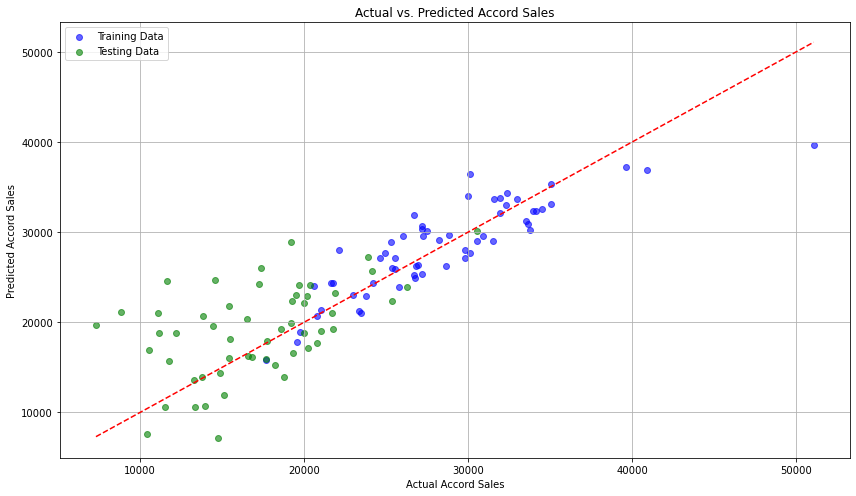

In [79]:
# Plotting the scatter plot for both training and testing data

plt.figure(figsize=(12, 7))

# training data
plt.scatter(training_data['AccordSales'], training_data['Predicted_AccordSales'], color='blue', alpha=0.6, label='Training Data')
# testing data
plt.scatter(testing_data['AccordSales'], testing_data['Predicted_AccordSales'], color='green', alpha=0.6, label='Testing Data')

# line
plt.plot([min(accord['AccordSales']), max(accord['AccordSales'])], 
         [min(accord['AccordSales']), max(accord['AccordSales'])], color='red', linestyle='--')

plt.title("Actual vs. Predicted Accord Sales")
plt.xlabel("Actual Accord Sales")
plt.ylabel("Predicted Accord Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Rederal Reserve data - Summary OLS

### Improved Linear Regression Model 7 Summary:

* Training $R^2$: 0.751
* Adjusted R-squared: 0.674
* Testing $OSR^2$: 0.81


#### Analysis:

The $OSR^2$ is 0.81, a big improvement from the previous model. The training data $R^2$ value of 75.1% is slightly higer than the previous model, which is good because we do not want to be overfitting the data. The true measure for the model perfomance however is the out of sample $R^2$. Our value is very high, suggesting accurate results on previously unseen data.

#### Justification for Variable Selection:

**`DTCTLN`**: The inclusion of nonrevolving consumer credit owned and securitized, not seasonally adjusted level column is a strategic choice because car sales should correlate with the volums of nonrevolving credit in the market. We observe high negative correlation between `DTCTLN` and `AccordSales` because higher credit balance should mean less consumers are on the market to make more purchases using loans. Also, I would blindly (naively and not justified by data/research) assume that many consumers purchase new cars (particularly more inferior types of cars and brands such as Honda) using some kind of financing options.

In [83]:
%%capture
!jupyter nbconvert --to html homework1.ipynb